# vegan restaurant analysis kiel

In this Notebook i want to investigate into Clusters of Vegan Restaurants arround Kiel
Imagine being a big new company wanting to find out a optimal cluster where the konkurrenz ist möglichst gering.



# Fragen an zum dataset:

- Wie ist das mit pauschal attribute zu droppen die nicht hoch representiert sind ?
-> am beispiel cuisine würde das nur für visualisierung verwenden jedoch mehr nicht da kaum im dataset vorhanden

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# use geopadas as special libary to work with geo-datagrames
# !pip install geopandas
import geopandas as gpd

In [262]:
# importing data from csv file
# the data was querryed from an OpenStreetMap API in the gettingData.ipynb
data_raw = pd.read_csv("data/restaurants_kiel.csv")
data = gpd.GeoDataFrame(data_raw)

data.set_index("id", inplace=True)

# Cleaning the data

In [263]:
# count na per attrobute of data

data.isna().sum().sort_values(ascending=True).head(25)

Unnamed: 0                   0
type                         0
lat                          0
name                         0
amenity                      0
diet:vegan                   0
lon                          0
opening_hours                5
diet:vegetarian              8
wheelchair                  13
addr:street                 23
addr:housenumber            24
outdoor_seating             26
addr:postcode               29
addr:city                   31
indoor_seating              33
cuisine                     34
website                     50
addr:country                51
phone                       65
takeaway                    66
smoking                     70
level                       71
toilets:wheelchair          71
check_date:opening_hours    77
dtype: int64

In [264]:
# Since alot of attributes are only available for a few restaurants, we will drop them

# we will drop attributes that are represented in less than 80% of the data
# the following how to calculate the percentage of na values in a column

print("For a attribute to be represented in 80 of the data, it can only have " + str(len(data) * 0.8) + " na values")

# drop colums with more than 20% na values
data.dropna(thresh=(len(data) * 0.8), axis=1, inplace=True)

For a attribute to be represented in 80 of the data, it can only have 76.80000000000001 na values


In [265]:
data.isna().sum().sort_values(ascending=True).head(25)

Unnamed: 0          0
type                0
lat                 0
lon                 0
amenity             0
diet:vegan          0
name                0
opening_hours       5
diet:vegetarian     8
wheelchair         13
dtype: int64

In [266]:
# Since Unnamed: 0 is a index column, we will drop it
data.drop(columns=["Unnamed: 0"], inplace=True)

In [267]:
# Analysing how many unique values each column has to get the value of the individual column

print("The ammount of unique values in each column is:")
data.nunique().sort_values(ascending=True).head(25)


The ammount of unique values in each column is:


type                1
diet:vegan          1
diet:vegetarian     2
wheelchair          3
amenity             5
opening_hours      87
name               90
lon                96
lat                96
dtype: int64

In [268]:
# since all attributes are from vegan restaurants and are nodes in OSM, we can drop the following columns

data.drop(columns=["type", "diet:vegan", "diet:vegetarian"], inplace=True)

In [269]:
# transforming wheelchair to categorical data
data["wheelchair"] = data["wheelchair"].astype("category")
data["amenity"] = data["amenity"].astype("category")

## Formating the opening_hours

Since the density of opening_hours information is pretty huge it would be a shame to continue using them as is in a string

In [270]:
# Analyse der Öffnungszeiten
# - Durchschnittliche Öffnungszeiten
# - Durchschnittliche Schließzeiten
# - Vlt Clusterung der Öffnung und Schließzeiten
# - Durchschnittliche Schließzeit in den einzelnen geografischen Clustern?

In [271]:
data["opening_hours"]

id
125623466      Mo-Fr 12:00-14:00,18:00-23:00; Sa 17:00-23:00;...
125625723                   Mo-Fr 06:00-18:30; Sa-Su 08:00-18:00
125626070      "There is no closing door, it's an open passag...
192214000                                      Mo-Su 11:30-23:00
268223175                       Mo-Sa 9:30-23:00; Su 10:00-23:00
                                     ...                        
9250395876                                     Mo-Su 10:30-20:00
9444022373                                     Fr-Su 17:00-21:00
9655694808                  Mo-Fr 07:00-18:00; Sa-Su 09:00-16:00
10080203674                                    Mo-Su 11:00-22:00
10825168020                                    Mo-Su 11:00-23:00
Name: opening_hours, Length: 96, dtype: object

## Removing Outliners

Removing outliners based on lat and lon



In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_53090/3392433084.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["lat"])
/tmp/ipykernel_53090/3392433084.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["lon"])


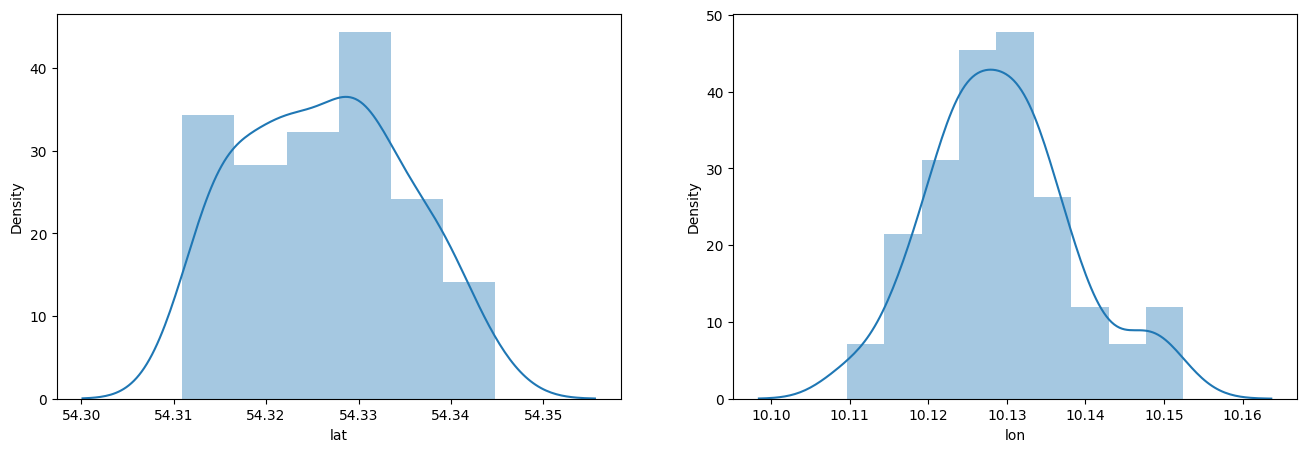

In [320]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data["lat"])
plt.subplot(1,2,2)
sns.distplot(data["lon"])
plt.show()

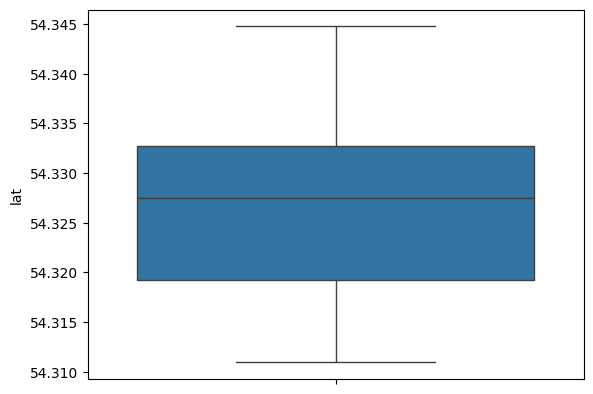

<Axes: ylabel='lon'>

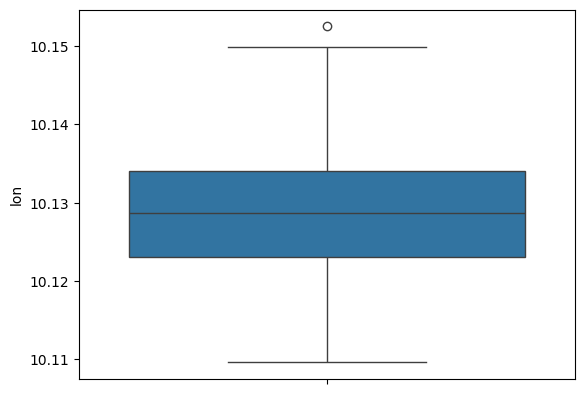

In [325]:
sns.boxplot(data['lat'])
plt.show()
sns.boxplot(data['lon'])

In [326]:
percentile25 = data['lat'].quantile(0.25)
percentile75 = data['lat'].quantile(0.75)

In [327]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

NameError: name 'iqr' is not defined

# Data visualization

<Axes: ylabel='count'>

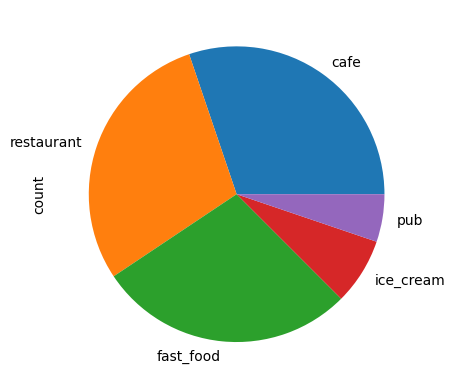

In [272]:
# the distribution of amenity as a pie chart

data["amenity"].value_counts().plot.pie()

<Axes: ylabel='count'>

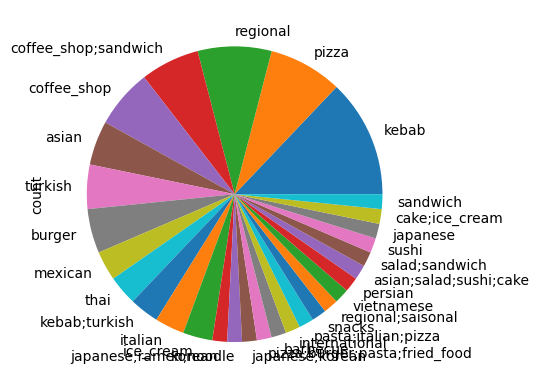

In [273]:
# the distribution of cuisine as a pie chart

data_raw["cuisine"].value_counts().plot.pie()

<Axes: ylabel='count'>

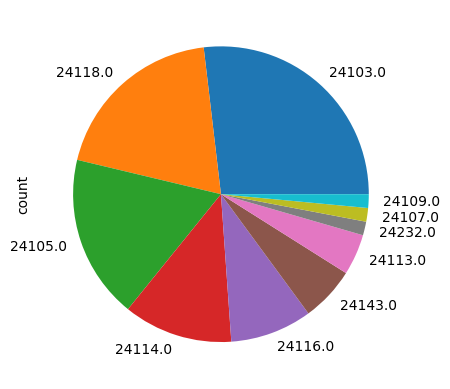

In [274]:
# display more information about the dataset

data_raw["addr:postcode"].value_counts().plot.pie()

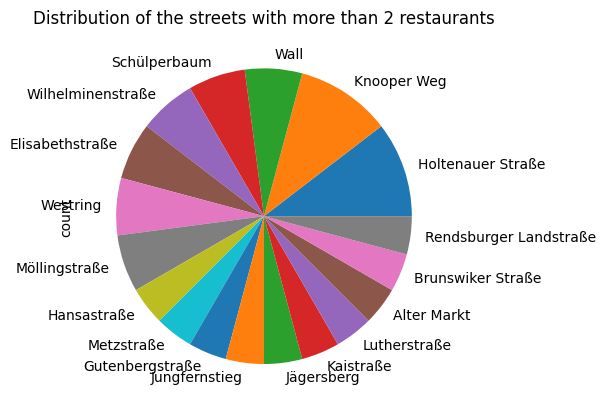

In [275]:
# only return the values that are represented 2 or more times

data_raw["addr:street"].value_counts()[data_raw["addr:street"].value_counts() >= 2].plot.pie()
plt.title("Distribution of the streets with more than 2 restaurants")
plt.show()

# Clustering

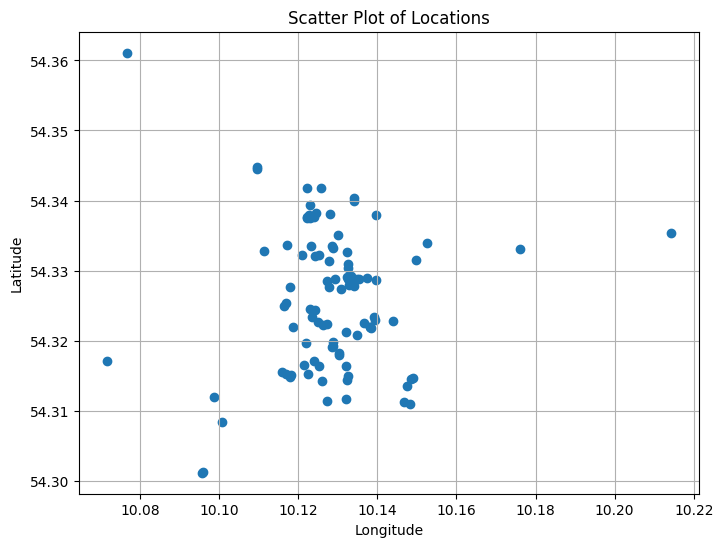

In [276]:
# Create a simple scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['lon'], data['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Locations')
plt.grid(True)
plt.show()

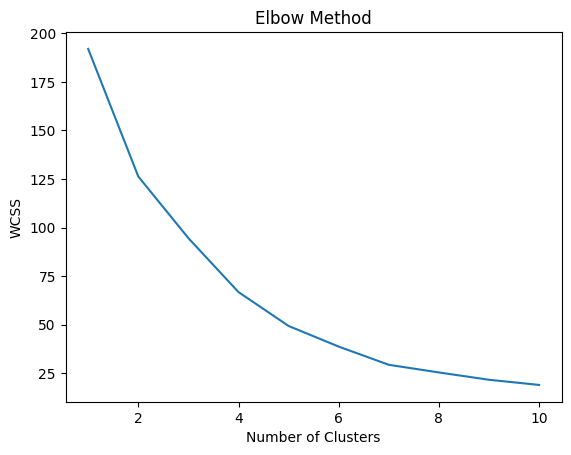

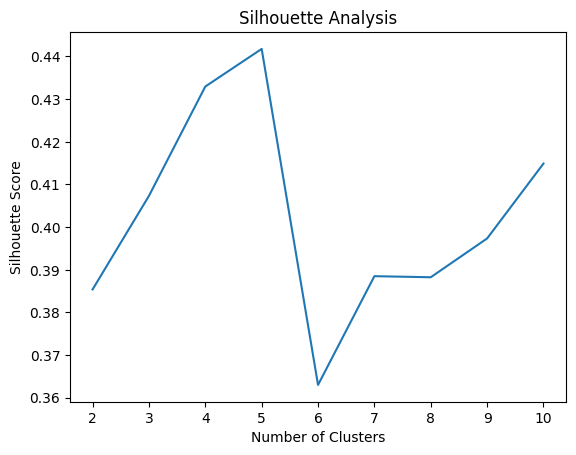

The silhouette score for the best cluster is: 0.44176858374157035


In [277]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select the columns of interest
selected_columns = data[["lat", "lon"]]

# Standardize the data
scaler = StandardScaler()
selected_columns_scaled = scaler.fit_transform(selected_columns)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
selected_columns_pca = pca.fit_transform(selected_columns_scaled)

# Perform elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_columns_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Perform silhouette analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_columns_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(selected_columns_pca, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# returning the silhouette score for the best cluster
print("The silhouette score for the best cluster is: " + str(max(silhouette_scores)))

By the rule of thumb a silhouette score is between 0.5 ≥ sC > 0.25 so we have a weak structure wich is close to a usable structure

/home/mbrucker/sem1/sem1_math_and_stats/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


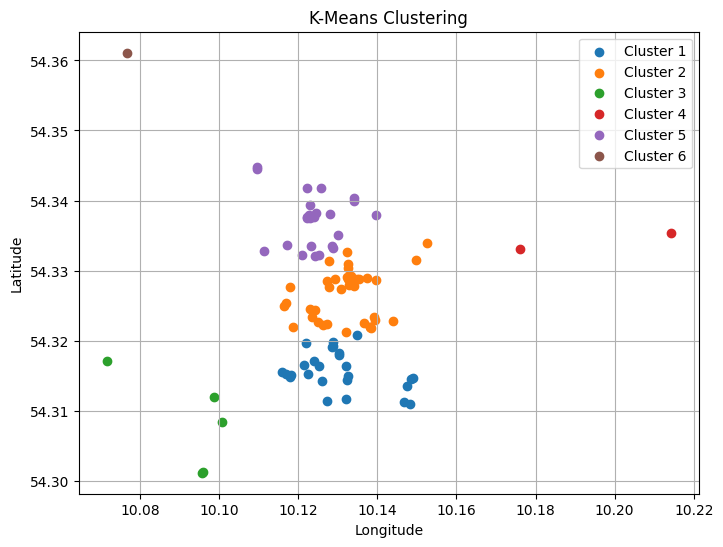

In [278]:
# Define the number of clusters (you can use the result from the elbow method)
n_clusters = 6

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(selected_columns_scaled)

# Add cluster labels to the DataFrame
data['cluster'] = kmeans.labels_

# Create a scatter plot with clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [279]:
# itterate trough the clusters and print the number of data instances

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f'Cluster {cluster + 1}: {cluster_data.shape[0]} data instances')


# Source of Code: 06_2_clans_iris.ipynb

Cluster 1: 26 data instances
Cluster 2: 38 data instances
Cluster 3: 5 data instances
Cluster 4: 2 data instances
Cluster 5: 24 data instances
Cluster 6: 1 data instances


# Removing Outlayers:

In [280]:
# drop rows with the clusters 3 4 and 6

data.drop(data[data["cluster"] == 2].index, inplace=True)
data.drop(data[data["cluster"] == 3].index, inplace=True)
data.drop(data[data["cluster"] == 5].index, inplace=True)

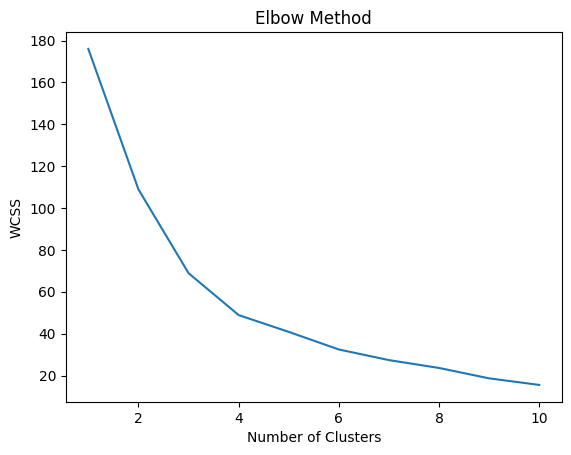

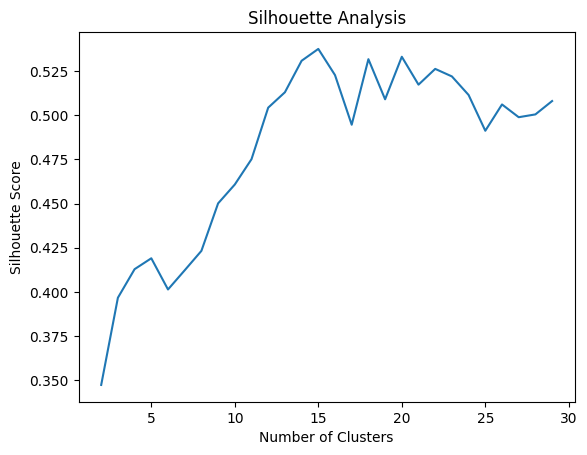

The silhouette score for the best cluster is: 0.5374083718130481


In [288]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select the columns of interest
selected_columns = data[["lat", "lon"]]

# Standardize the data
scaler = StandardScaler()
selected_columns_scaled = scaler.fit_transform(selected_columns)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
selected_columns_pca = pca.fit_transform(selected_columns_scaled)

# Perform elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_columns_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Perform silhouette analysis
silhouette_scores = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_columns_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(selected_columns_pca, labels))

# Plot silhouette scores
plt.plot(range(2, 30), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# returning the silhouette score for the best cluster
print("The silhouette score for the best cluster is: " + str(max(silhouette_scores)))

/home/mbrucker/sem1/sem1_math_and_stats/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


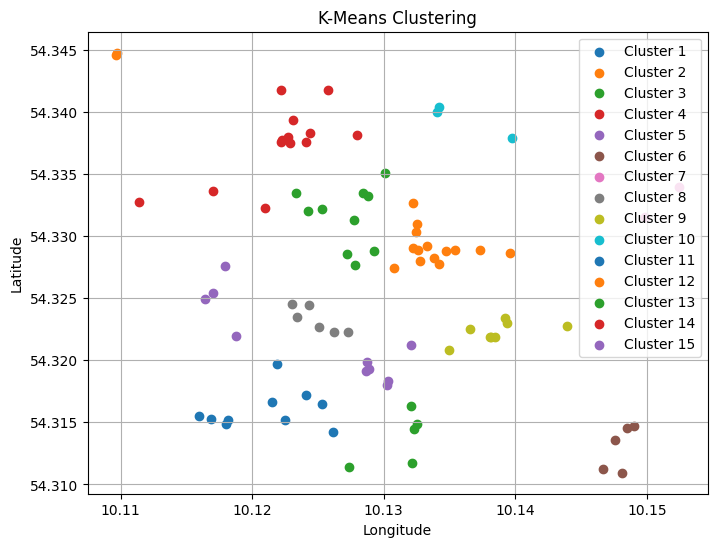

In [295]:
# Define the number of clusters (you can use the result from the elbow method)
n_clusters = 15

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(selected_columns_scaled)

# Add cluster labels to the DataFrame
data['cluster'] = kmeans.labels_

# Create a scatter plot with clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], label=f'Cluster {cluster + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


# Analyzing the Clusters

In [290]:
# return the unique sum of amenitys inside each cluster name the type of amiety

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f'Cluster {cluster + 1}: {cluster_data["amenity"].unique()}')

Cluster 1: ['pub', 'fast_food', 'cafe', 'ice_cream']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 2: ['restaurant', 'fast_food', 'pub', 'cafe']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 3: ['restaurant', 'cafe', 'fast_food']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 4: ['restaurant', 'cafe']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 5: ['fast_food', 'cafe', 'ice_cream']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 6: ['pub', 'fast_food', 'cafe']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 7: ['restaurant']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 8: ['cafe', 'fast_food', 'pub']
Categories (5, object): ['cafe', 'fast_food', 'ice_cream', 'pub', 'restaurant']
Cluster 9: ['fast_fo

In [304]:
# print the density of the amenitys of the clusters in a chart

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f'Cluster {cluster + 1}: {cluster_data["amenity"].value_counts()}')

Cluster 1: amenity
cafe          1
fast_food     1
ice_cream     1
pub           1
restaurant    0
Name: count, dtype: int64
Cluster 2: amenity
restaurant    8
fast_food     3
cafe          2
pub           1
ice_cream     0
Name: count, dtype: int64
Cluster 3: amenity
cafe          2
restaurant    2
fast_food     1
ice_cream     0
pub           0
Name: count, dtype: int64
Cluster 4: amenity
cafe          6
restaurant    4
fast_food     0
ice_cream     0
pub           0
Name: count, dtype: int64
Cluster 5: amenity
fast_food     2
cafe          1
ice_cream     1
pub           0
restaurant    0
Name: count, dtype: int64
Cluster 6: amenity
cafe          2
fast_food     2
pub           1
ice_cream     0
restaurant    0
Name: count, dtype: int64
Cluster 7: amenity
restaurant    2
cafe          0
fast_food     0
ice_cream     0
pub           0
Name: count, dtype: int64
Cluster 8: amenity
cafe          4
fast_food     1
pub           1
ice_cream     0
restaurant    0
Name: count, dtype: int64


In [292]:
# print the included streetnames of each cluster, display it on a map

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    print(f'Cluster {cluster + 1}: {cluster_data["addr:street"].unique()}')

KeyError: 'addr:street'

## Geografische beschreibung der Cluster

- Cluster 1 Bahnhof
- Cluster 2 Innenstadt
- Cluster 3 Hassee
- Cluster 4 Schönkirchen
- Cluster 5 Universität